In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [85]:
data = pd.read_csv('VIX_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [86]:
data_lagged_VIX = data_clean
data_lagged_VIX['Lagged VIX'] = data_clean['VIX'].shift(-1)


In [88]:
explanatory_vars = data_clean.drop(columns=['Date','VIX','VXN Open','VXN High','VXN Low','VXN Close','VXN Adj Close'])
explanatory_vars_lagged = data_lagged_VIX.drop(columns=['Date','VIX','VXN Open','VXN High','VXN Low','VXN Close','VXN Adj Close','Lagged VIX'])

# Unlagged

In [73]:
all_feature_names = list(explanatory_vars.columns)
best_features = []
best_rmse = float('inf')
remaining_features = all_feature_names.copy()

In [74]:
y = data_clean['VIX']

In [75]:
for i in range(len(remaining_features)):
    feature_to_add = None
    for feature in remaining_features:
        selected_features = best_features + [feature]
        X_subset = data_clean[selected_features]
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        rf_model_subset = RandomForestRegressor(n_estimators=500, random_state=42)
        rf_model_subset.fit(X_train_subset, y_train_subset)
        y_pred_subset = rf_model_subset.predict(X_test_subset)
        mse_subset = mean_squared_error(y_test_subset, y_pred_subset)
        rmse_subset = np.sqrt(mse_subset)
        print(selected_features)
        print(rmse_subset)
        if rmse_subset < best_rmse:
            best_rmse = rmse_subset
            feature_to_add = feature
    if feature_to_add:
        best_features.append(feature_to_add)
        remaining_features.remove(feature_to_add)
    else:
        break

best_features, best_rmse

['Unemployment Rate']
4.726485969496905
['CPI']
3.401544092835611
['Three Month T Bill Rate']
5.01771440424813
['Six Month T Bill Rate']
4.70757246835617
['10-Year Treasury Constant Maturity Rate']
5.257604479970309
['Fed Rate']
5.121854887710397
['BBB Rate']
6.247724741742328
['SP500 Index']
6.7695305248257185
['GDP']
3.5131312478602075
['Initial Claims']
5.564430130845822
['JPY/USD Spot Rate']
4.55842648396092
['Total Nonfarm Employees']
4.173707399264649
['Spot Crude Oil Price']
4.568403572591202
['SP500 Volume']
5.3595627298715955
['NASDAQ Open']
4.108648552688523
['NASDAQ High']
4.094314346706025
['NASDAQ Low']
4.686571826153423
['NASDAQ Close']
4.533448645444839
['NASDAQ Adj Close']
4.533448645444839
['NASDAQ Volume']
4.611974314067061
['DJI Open']
4.462272946573737
['DJI High']
5.5960748342080695
['DJI Low']
5.426326536909788
['DJI Close']
3.7968128196535793
['DJI Adj Close']
3.7968128196535793
['DJI Volume']
5.149048418510601
['RUSSELL2000 Open']
7.470599035410446
['RUSSELL2000

(['CPI', 'RUSSELL2000 Close', 'USD INDEX Open', 'NIKKEI Low'],
 1.6701454920754646)

In [76]:
X = data_clean[best_features]
y = data_clean['VIX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [78]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.6701454920754646

In [79]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [80]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

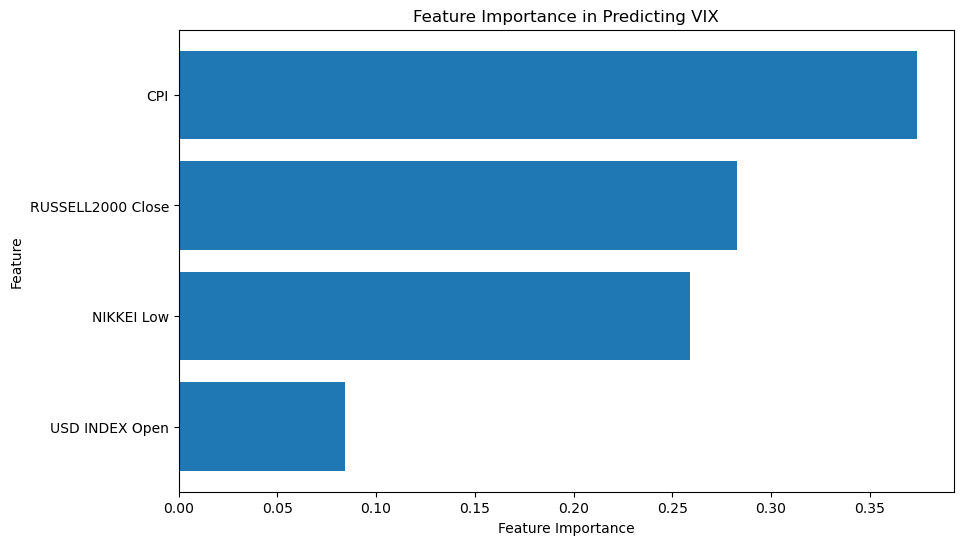

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

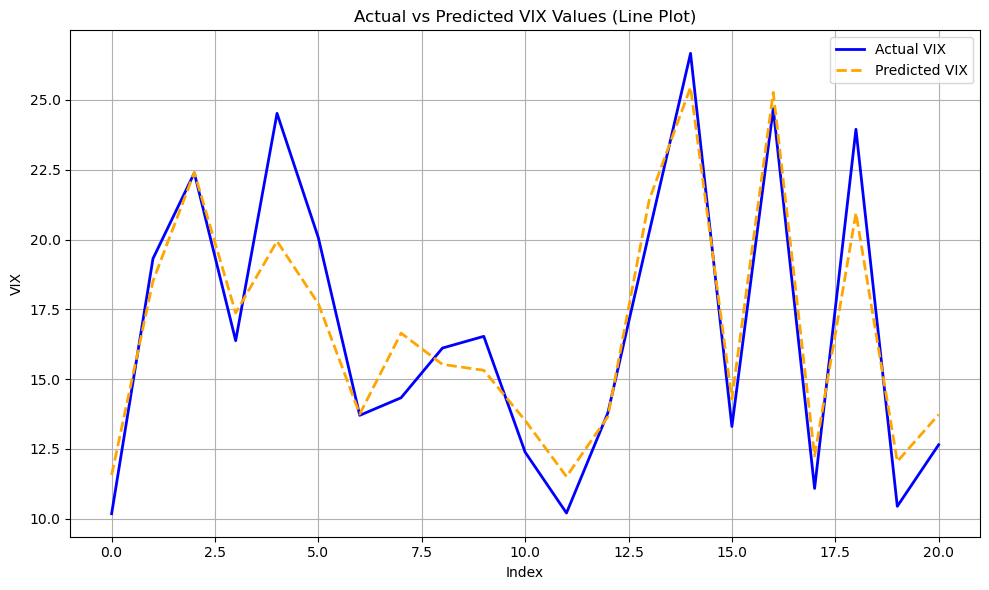

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Lagged

In [89]:
all_feature_names = list(explanatory_vars_lagged.columns)
best_features = []
best_rmse = float('inf')
remaining_features = all_feature_names.copy()

In [92]:
data_lagged_VIX = data_lagged_VIX.dropna(subset=['Lagged VIX'])

In [93]:
y = data_lagged_VIX['Lagged VIX']

In [94]:
for i in range(len(remaining_features)):
    feature_to_add = None
    for feature in remaining_features:
        selected_features = best_features + [feature]
        X_subset = data_lagged_VIX[selected_features]
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        rf_model_subset = RandomForestRegressor(n_estimators=500, random_state=42)
        rf_model_subset.fit(X_train_subset, y_train_subset)
        y_pred_subset = rf_model_subset.predict(X_test_subset)
        mse_subset = mean_squared_error(y_test_subset, y_pred_subset)
        rmse_subset = np.sqrt(mse_subset)
        print(selected_features)
        print(rmse_subset)
        if rmse_subset < best_rmse:
            best_rmse = rmse_subset
            feature_to_add = feature
    if feature_to_add:
        best_features.append(feature_to_add)
        remaining_features.remove(feature_to_add)
    else:
        break

best_features, best_rmse

['Unemployment Rate']
4.319365288532482
['CPI']
2.8367145107861753
['Three Month T Bill Rate']
3.64386422801994
['Six Month T Bill Rate']
5.14118049861656
['10-Year Treasury Constant Maturity Rate']
4.39995890221195
['Fed Rate']
4.056083469674057
['BBB Rate']
4.934445632380384
['SP500 Index']
4.185762540315633
['GDP']
3.349265540507169
['Initial Claims']
4.4137128038504265
['JPY/USD Spot Rate']
5.270689698300957
['Total Nonfarm Employees']
3.3751511672530374
['Spot Crude Oil Price']
4.939204325081165
['SP500 Volume']
4.922713941709376
['NASDAQ Open']
3.106832877870826
['NASDAQ High']
2.933465394849758
['NASDAQ Low']
3.833435754772271
['NASDAQ Close']
3.8065807857696212
['NASDAQ Adj Close']
3.8065807857696212
['NASDAQ Volume']
4.47721475578073
['DJI Open']
3.819220574415421
['DJI High']
3.8123050328652295
['DJI Low']
4.718243336984086
['DJI Close']
3.4387001108676114
['DJI Adj Close']
3.4387001108676114
['DJI Volume']
4.451914877188087
['RUSSELL2000 Open']
5.597467377682042
['RUSSELL200

(['CPI',
  'DJI Low',
  'GOLD Open',
  'DJI Close',
  'DJI High',
  'FTSE High',
  'NIKKEI Close',
  'NIKKEI Open',
  'FTSE Close',
  'RUSSELL2000 Low',
  'BBB Rate',
  'FTSE Volume',
  'NIKKEI High',
  'USD INDEX Low'],
 1.3726363247328865)

In [95]:
X_lagged = data_lagged_VIX[best_features]
y_lagged = data_lagged_VIX['Lagged VIX']
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, random_state=42)

In [96]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [97]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_updated = np.sqrt(mse)
rmse_updated

1.3726363247328865

In [99]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_lagged.columns,
    'Importance': feature_importances
})

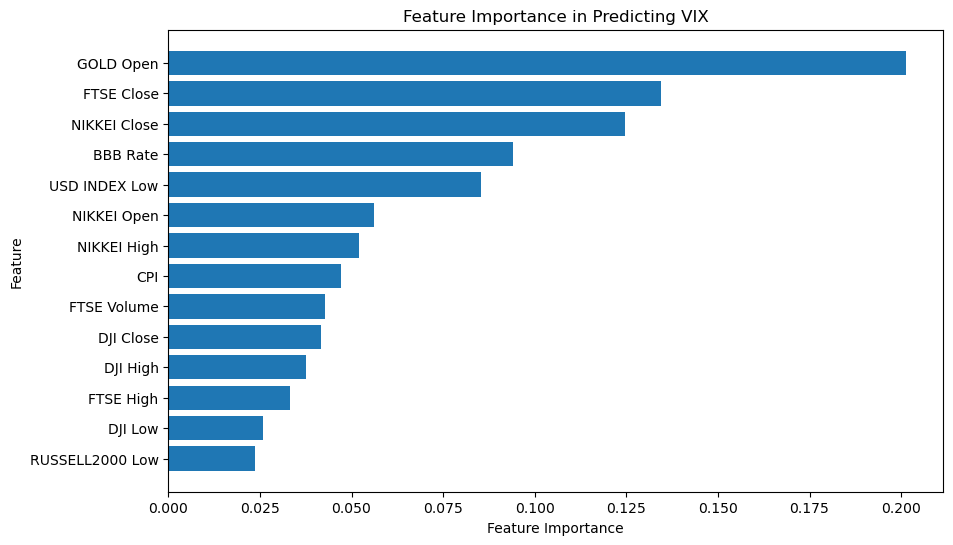

In [100]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

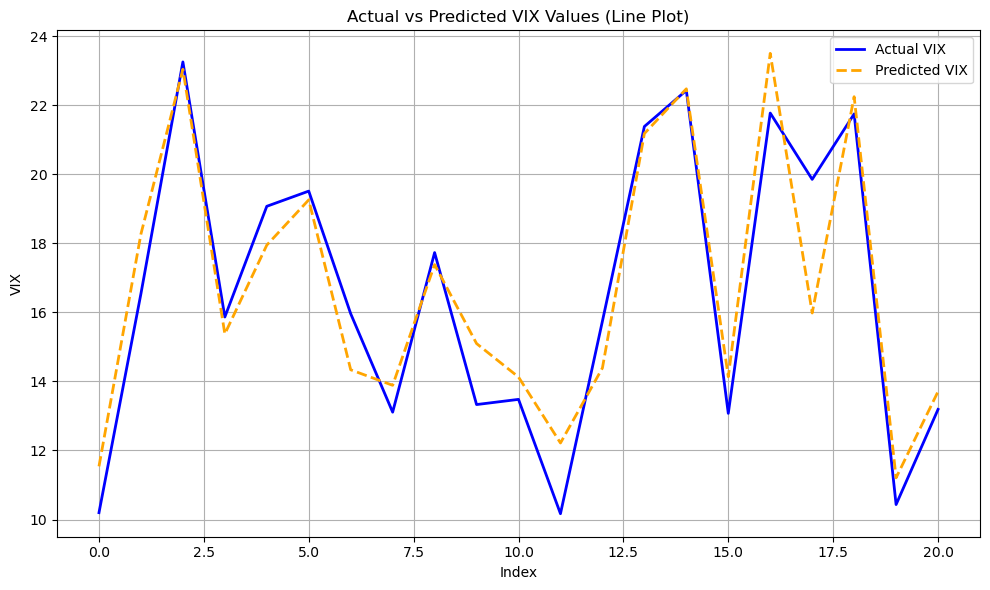

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()